# IMPORT LIBS

In [95]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# PANDAS OPTIONS

In [2]:
pd.options.display.float_format = '{:.0f}'.format

# OPEN DATASETS

In [62]:
df = pd.read_csv('../DATA/IN/extract_gold_dvf.csv', sep=';')
df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_24856\249013501.py:1: DtypeWarning:

Columns (15,17,24) have mixed types. Specify dtype option on import or set low_memory=False.



,NoDisp,DateMutation,ValeurFonciere,NoVoie,BTQ,TypeVoie,CodeVoie,Voie,CP,Commune,...,SurfaceCarrez4emeLot,CinquiemeLot,SurfaceCarrez5emeLot,NombreLots,CodeTypeLocal,SurfaceReelleBati,NombrePiecesPrincipales,NatureCulture,NatureCultureSpeciale,SurfaceTerrain
0,1,2021-04-26,311650,16,NaN,RUE,0270,DE LA GRANGE DIMIERE,33850,LEOGNAN,...,NaN,NaN,NaN,1,1,84,4,NaN,NaN,NaN
1,1,2021-04-26,122000,28,NaN,CRS,0840,DE VERDUN,33470,GUJAN MESTRAS,...,NaN,NaN,NaN,1,1,34,2,NaN,NaN,NaN
2,1,2021-04-23,420612,47,NaN,RUE,0144,JEAN MARIE PELT,33380,MIOS,...,NaN,NaN,NaN,0,1,130,4,S,NaN,607
3,1,2021-04-19,167000,1,NaN,RUE,0030,ARMAND DANEY,33470,GUJAN MESTRAS,...,NaN,NaN,NaN,2,2,49,2,NaN,NaN,NaN
4,1,2021-05-05,450000,11,NaN,ALL,1180,FRERES DUPUY CAZAUX,33260,LA TESTE-DE-BUCH,...,NaN,NaN,NaN,0,1,105,4,S,NaN,684


# FIRST ANALYS 

In [63]:
df.dtypes

NoDisp                       int64
DateMutation                object
ValeurFonciere              object
NoVoie                     float64
BTQ                         object
TypeVoie                    object
CodeVoie                    object
Voie                        object
CP                           int64
Commune                     object
CodeDepartement              int64
CodeCommune                  int64
PrefixeSection             float64
Section                     object
NoPlan                       int64
PremierLot                  object
SurfaceCarrez1erLot         object
DeuxiemeLot                 object
SurfaceCarrez2emeLot        object
TroisiemeLot               float64
SurfaceCarrez3emeLot        object
QuatriemeLot               float64
SurfaceCarrez4emeLot        object
CinquiemeLot               float64
SurfaceCarrez5emeLot        object
NombreLots                   int64
CodeTypeLocal                int64
SurfaceReelleBati          float64
NombrePiecesPrincipa

#### Colum type to change :

- ValeurFonciere à transformer en float
- Toutes les surfaces carrez à transformer en float comme valeur foncière
- NoVoie à transformer en int
- NombrePiecesPrincipales à transformer en int

# FIRST MODIFICATIONS

In [64]:
# Modification of ValeurFonciere
df['ValeurFonciere'] = df['ValeurFonciere'].str.replace(',', '.').astype(float)

In [65]:
# Modification of SurfaceCarrez
df['SurfaceCarrez1erLot'] = df['SurfaceCarrez1erLot'].str.replace(',', '.').astype(float)
df['SurfaceCarrez2emeLot'] = df['SurfaceCarrez2emeLot'].str.replace(',', '.').astype(float)
df['SurfaceCarrez3emeLot'] = df['SurfaceCarrez3emeLot'].str.replace(',', '.').astype(float)
df['SurfaceCarrez4emeLot'] = df['SurfaceCarrez4emeLot'].str.replace(',', '.').astype(float)
df['SurfaceCarrez5emeLot'] = df['SurfaceCarrez5emeLot'].str.replace(',', '.').astype(float)

In [66]:
# Modification of NoVoie

#Transform NA values to 0
df['NoVoie'] = df['NoVoie'].fillna(0)

# Modification of NoVoie type
df['NoVoie'] = df['NoVoie'].astype(int)

In [67]:
# Modification of non numeric values of NombrePiecesPrincipales 

df['NombrePiecesPrincipales'] = (
    pd.to_numeric(df['NombrePiecesPrincipales'],
                  errors='coerce')
    .fillna(0)
)

# Modification of NombrePiecesPrincipales type
df['NombrePiecesPrincipales'] = df['NombrePiecesPrincipales'].astype(int)

In [68]:
df.dtypes

NoDisp                       int64
DateMutation                object
ValeurFonciere             float64
NoVoie                       int32
BTQ                         object
TypeVoie                    object
CodeVoie                    object
Voie                        object
CP                           int64
Commune                     object
CodeDepartement              int64
CodeCommune                  int64
PrefixeSection             float64
Section                     object
NoPlan                       int64
PremierLot                  object
SurfaceCarrez1erLot        float64
DeuxiemeLot                 object
SurfaceCarrez2emeLot       float64
TroisiemeLot               float64
SurfaceCarrez3emeLot       float64
QuatriemeLot               float64
SurfaceCarrez4emeLot       float64
CinquiemeLot               float64
SurfaceCarrez5emeLot       float64
NombreLots                   int64
CodeTypeLocal                int64
SurfaceReelleBati          float64
NombrePiecesPrincipa

# ANALYS

In [69]:
df.describe()

,NoDisp,ValeurFonciere,NoVoie,CP,CodeDepartement,CodeCommune,PrefixeSection,NoPlan,SurfaceCarrez1erLot,SurfaceCarrez2emeLot,...,SurfaceCarrez3emeLot,QuatriemeLot,SurfaceCarrez4emeLot,CinquiemeLot,SurfaceCarrez5emeLot,NombreLots,CodeTypeLocal,SurfaceReelleBati,NombrePiecesPrincipales,SurfaceTerrain
count,175017,174644,175017,175017,175017,175017,888,175017,30653,2974,...,397,348,114,153,83,175017,175017,175011,175017,115570
mean,1,603062,466,33403,33,226,211,376,57,61,...,56,61,37,56,28,0,1,87,4,3096
std,0,1910822,1818,264,0,171,174,505,56,27,...,30,280,31,78,25,1,0,49,2,19125
min,1,1,0,33000,33,1,41,1,1,2,...,8,2,6,2,6,0,1,1,0,1
25%,1,166000,8,33185,33,63,41,88,37,42,...,36,6,21,7,24,0,1,53,2,281
50%,1,260000,23,33380,33,200,107,203,52,61,...,58,20,21,41,24,0,1,80,4,522
75%,1,419000,70,33610,33,339,346,455,70,75,...,68,91,45,93,24,1,2,108,4,936
max,43,72277368,9999,33990,33,555,495,6250,6202,310,...,262,5078,157,867,145,17,2,1000,54,382680


#### PENSER A VERIFIER LES DATA QUALITATIVE (STRING)

- Certains biens ne semblent pas avoir de valeur foncière (174 644 VF pour 175 017 bien) sachant que c'est notre Label, nous supprimerons les individus avec cette valeur manquante.
- Certains biens semblent avoir une VF Outliers (MAX 7 227 736 800 et MIN 1) verif. leurs nombres
- Les Prefix. de Section ne sont pas renseignés (888 pour 175 017 biens...) on ne pourra pas s'appuyer sur le cadastre pour construire une DATA VIZ géographique 
- Pour rappel Code Type Local : 
    - 1 Maison 
    - 2 Appt.
- 6 biens n'ont pas de Surface Réel Bati., nous supprimerons ces individus
- Idems pour Nombre de pièçes principales (de plus certains biens sont outliers sur cette variable) on a des biens à 0 et des bien à 54 
- Pour la surface du terrain, certains biens sont à 0, d'autre ont une surface de 382 680 vérif. les outliers.

# FIRST FEATURE ENGINEERING

 ### ADD A PRICE RANGE FEATURE 

In [70]:
# Définir les tranches de valeur foncière
bins = [50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 600000, 750000, 1000000, 1500000, 2000000, 3000000, 4000000, 5000000, 6000000, df['ValeurFonciere'].max()]

# Utiliser cut pour créer une nouvelle colonne 'Tranche'
df['slice'] = pd.cut(df['ValeurFonciere'], bins=bins, right=False)

### DISPLAY NUMBER OF BUILDING BY PRICE RANGE

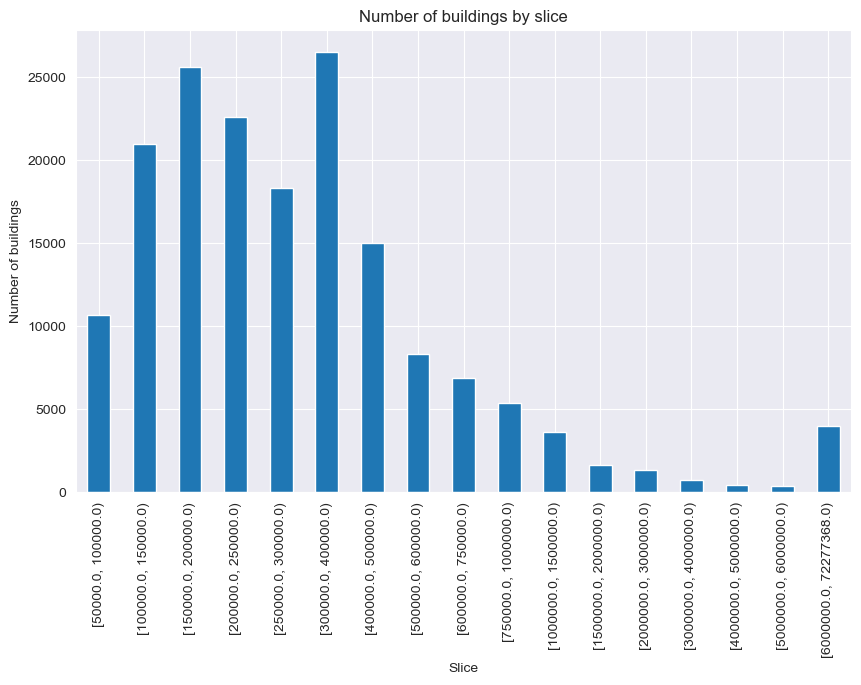

In [71]:
# Compter les biens par tranche
tranche_count = df['slice'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
tranche_count.plot(kind='bar')
plt.title('Number of buildings by slice')
plt.xlabel('Slice')
plt.ylabel('Number of buildings')
plt.show()

# ANALYS

## CREATE A HEATMAP TO SHOW CORRELATION BETWEEN ALL FEATURES

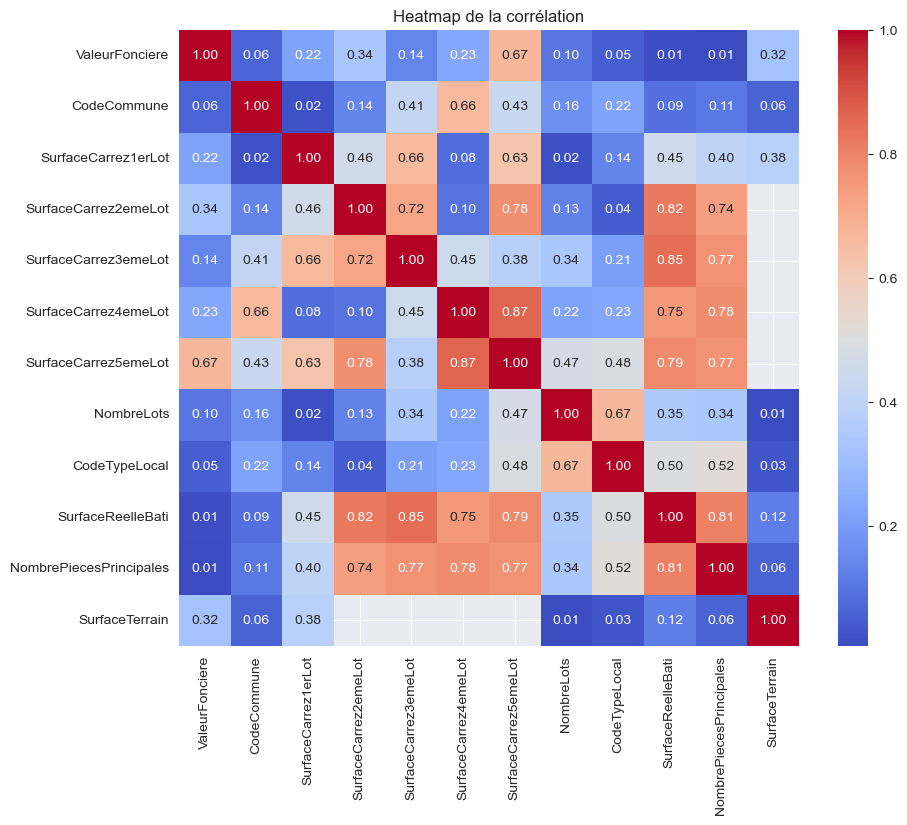

In [72]:
# Supprimer les colonnes non numériques
cols_to_drop = ['NoDisp', 'DateMutation', 'NoPlan', 'CP', 'NoVoie', 'PremierLot', 'DeuxiemeLot', 'TroisiemeLot', 'QuatriemeLot', 'CinquiemeLot', 'BTQ', 'TypeVoie', 'CodeVoie', 'Voie', 'Commune', 'CodeDepartement', 'PrefixeSection', 'Section', 'NatureCulture', 'NatureCultureSpeciale']
df_num = df.drop(columns=cols_to_drop)

# Convertir toutes les colonnes en numérique, ignorer les erreurs ('coerce' crée NaN pour les non convertibles)
df_num = df_num.apply(pd.to_numeric, errors='coerce')

# Supprimer les colonnes avec toutes les valeurs NaN résultant de la conversion
df_num = df_num.dropna(axis=1, how='all')

# Calculer la matrice de corrélation sur les colonnes restantes
corr_df_num = abs(df_num.corr())

# Utiliser Seaborn pour créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_num, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de la corrélation')
plt.show()

## ANALYS OF DATE DE VENTE 

### FEATURES ENGINEERING OF DATE FIELDS

In [76]:
# Convertir la colonne 'DateMutation' en datetime si ce n'est pas déjà fait
df['DateMutation'] = pd.to_datetime(df['DateMutation'])

# Extraire le numéro du trimestre de chaque date
df['quarter'] = df['DateMutation'].dt.quarter

# Extraire l'année 
df['Year'] = df['DateMutation'].dt.year

# Extraire le mois 
df['Month'] = df['DateMutation'].dt.month

df

,NoDisp,DateMutation,ValeurFonciere,NoVoie,BTQ,TypeVoie,CodeVoie,Voie,CP,Commune,...,CodeTypeLocal,SurfaceReelleBati,NombrePiecesPrincipales,NatureCulture,NatureCultureSpeciale,SurfaceTerrain,slice,quarter,Year,Month
0,1,2021-04-26,311650,16,NaN,RUE,0270,DE LA GRANGE DIMIERE,33850,LEOGNAN,...,1,84,4,NaN,NaN,NaN,"[300000.0, 400000.0)",2,2021,4
1,1,2021-04-26,122000,28,NaN,CRS,0840,DE VERDUN,33470,GUJAN MESTRAS,...,1,34,2,NaN,NaN,NaN,"[100000.0, 150000.0)",2,2021,4
2,1,2021-04-23,420612,47,NaN,RUE,0144,JEAN MARIE PELT,33380,MIOS,...,1,130,4,S,NaN,607,"[400000.0, 500000.0)",2,2021,4
3,1,2021-04-19,167000,1,NaN,RUE,0030,ARMAND DANEY,33470,GUJAN MESTRAS,...,2,49,2,NaN,NaN,NaN,"[150000.0, 200000.0)",2,2021,4
4,1,2021-05-05,450000,11,NaN,ALL,1180,FRERES DUPUY CAZAUX,33260,LA TESTE-DE-BUCH,...,1,105,4,S,NaN,684,"[400000.0, 500000.0)",2,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175012,1,2020-08-06,159300,6,NaN,RTE,0023,DE LA LANDETTE,33340,BLAIGNAN-PRIGNAC,...,1,103,5,S,NaN,500,"[150000.0, 200000.0)",3,2020,8
175013,1,2020-08-07,465000,20,NaN,PAS,0304,COMMUNALE DE TOTTORAL,33780,SOULAC-SUR-MER,...,1,226,9,S,NaN,756,"[400000.0, 500000.0)",3,2020,8
175014,1,2020-08-07,465000,20,NaN,PAS,0304,COMMUNALE DE TOTTORAL,33780,SOULAC-SUR-MER,...,1,226,9,AG,NaN,1000,"[400000.0, 500000.0)",3,2020,8
175015,1,2020-07-17,283925,30,NaN,BD,0234,LOUIS CONSTANT,33780,SOULAC-SUR-MER,...,1,132,6,S,NaN,601,"[250000.0, 300000.0)",3,2020,7


## ANALYS OF NUMBER SALES BY YEAR / QUARTER / MONTH 

### YEAR ANALYS

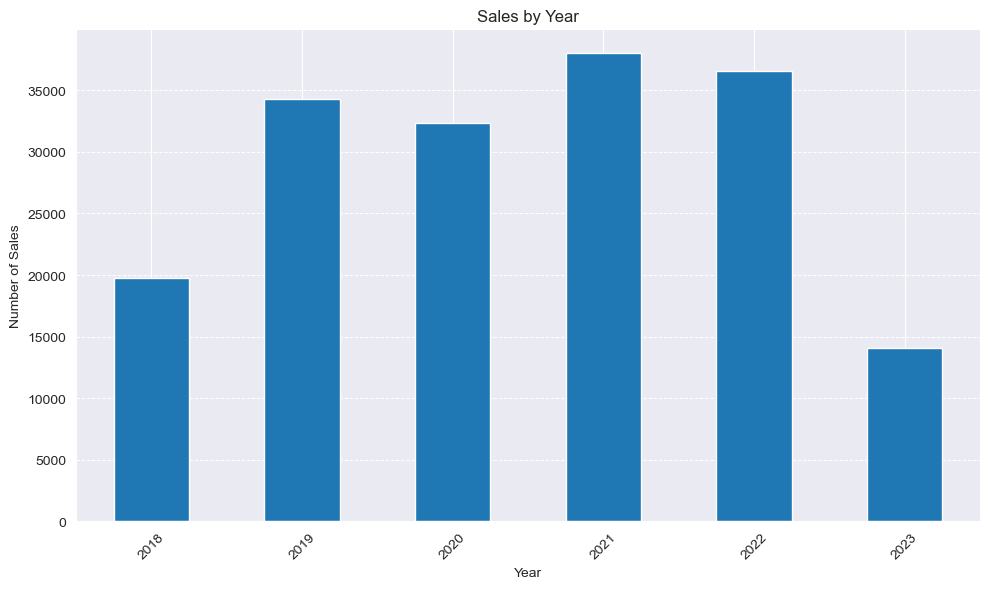

In [77]:
# Calculer le nombre de ventes par année
sales_per_year = df['Year'].value_counts().sort_index()

# Créer un bar plot pour le nombre de ventes par année
plt.figure(figsize=(10, 6))
sales_per_year.plot(kind='bar')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


### ANALYS BY QUARTER

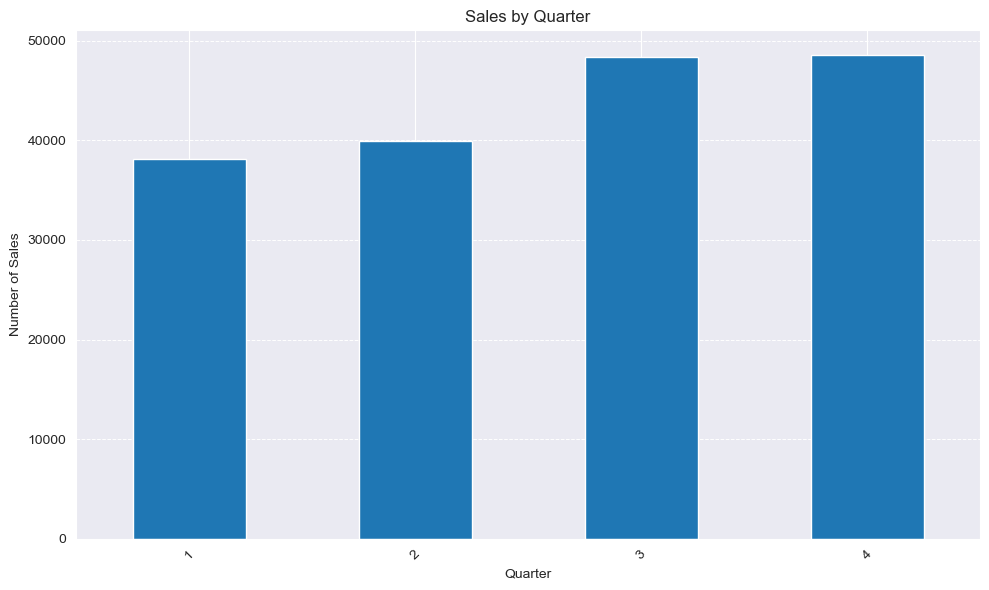

In [78]:
# Calculer le nombre de ventes par trimestre
sales_per_year = df['quarter'].value_counts().sort_index()

# Créer un bar plot pour le nombre de ventes par trimestre
plt.figure(figsize=(10, 6))
sales_per_year.plot(kind='bar')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

### ANALYS BY MONTH

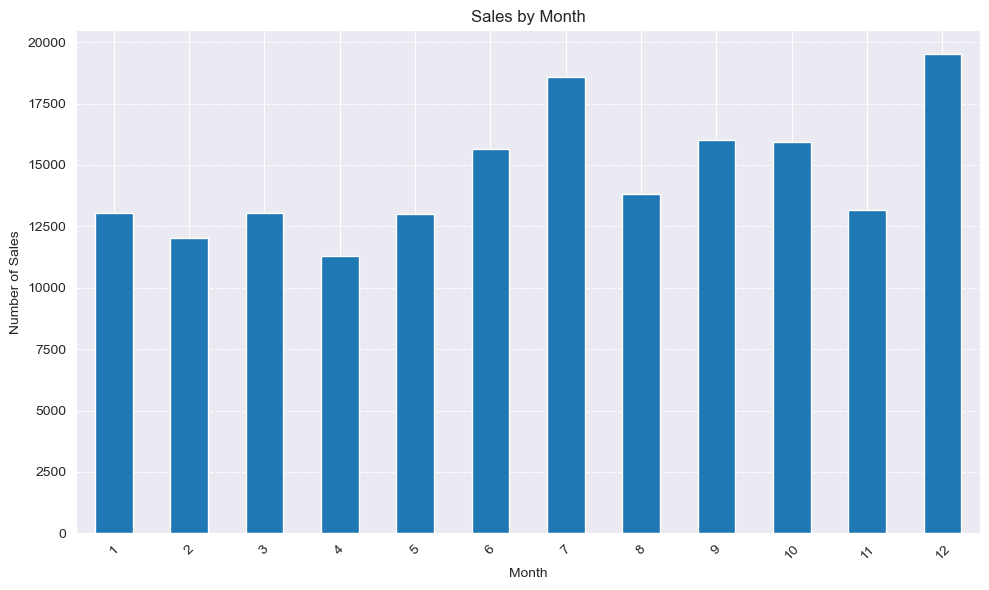

In [79]:
# Calculer le nombre de ventes par trimestre
sales_per_year = df['Month'].value_counts().sort_index()

# Créer un bar plot pour le nombre de ventes par trimestre
plt.figure(figsize=(10, 6))
sales_per_year.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

## ANALYS OF VALEUR FONCIERE BY PERIOD

### ANALYS BY YEAR 

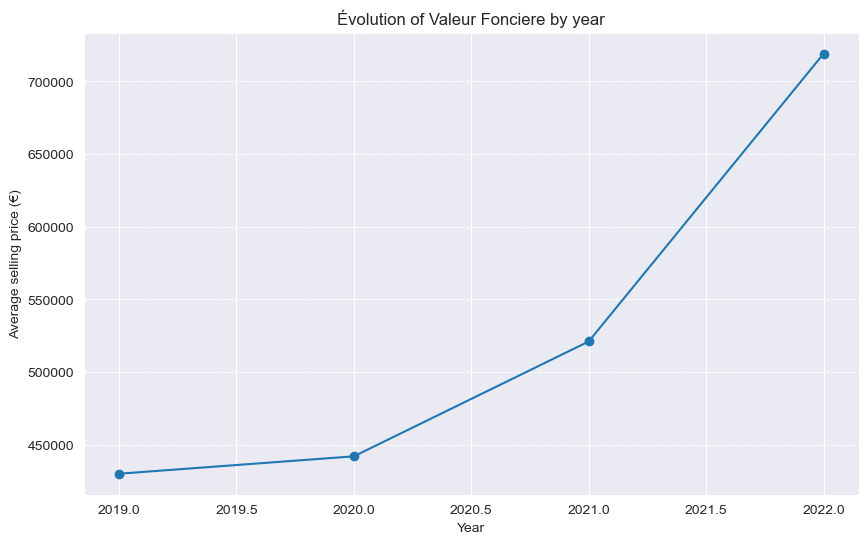

In [81]:
# Exclure 2018 et 2019 qui ne sont pas des années pleines
df_year = df.loc[(df['Year'] >= 2019 ) &  (df['Year'] <= 2022 )]

# Calculer le prix de vente moyen par année 
average_price_per_year = df_year.groupby('Year')['ValeurFonciere'].mean()

# Créer un line plot pour l'évolution du prix de vente moyen par année
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='line', marker='o')

# Formater l'axe des prix pour éviter la notation scientifique
plt.ticklabel_format(style='plain', axis='y')

plt.title('Évolution of Valeur Fonciere by year')
plt.xlabel('Year')
plt.ylabel('Average selling price (€)')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

## CONCLUSIONS :

We saw a great STONK of the average price by Year, so it's important to keep Year for us ML Model.

### ANALYS BY QUARTER

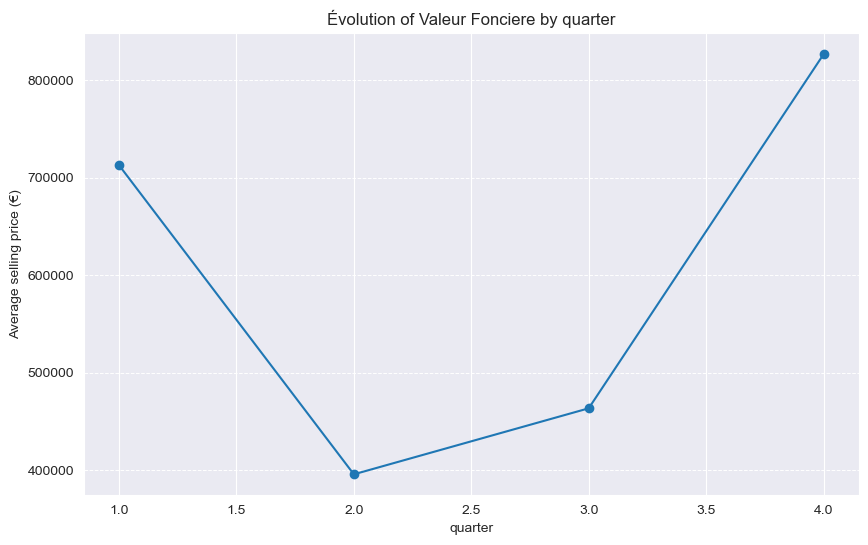

In [84]:
# Calculer le prix de vente moyen par quarter 
average_price_per_quarter = df.groupby('quarter')['ValeurFonciere'].mean()

# Créer un line plot pour l'évolution du prix de vente moyen par quarter
plt.figure(figsize=(10, 6))
average_price_per_quarter.plot(kind='line', marker='o')

# Formater l'axe des prix pour éviter la notation scientifique
plt.ticklabel_format(style='plain', axis='y')

plt.title('Évolution of Valeur Fonciere by quarter')
plt.xlabel('quarter')
plt.ylabel('Average selling price (€)')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

## CONCLUSIONS :

We saw a great FALL of the average price by Quarter on the second and third quarter, We need to inspect more this assumption.

### ANALYS BY MONTH

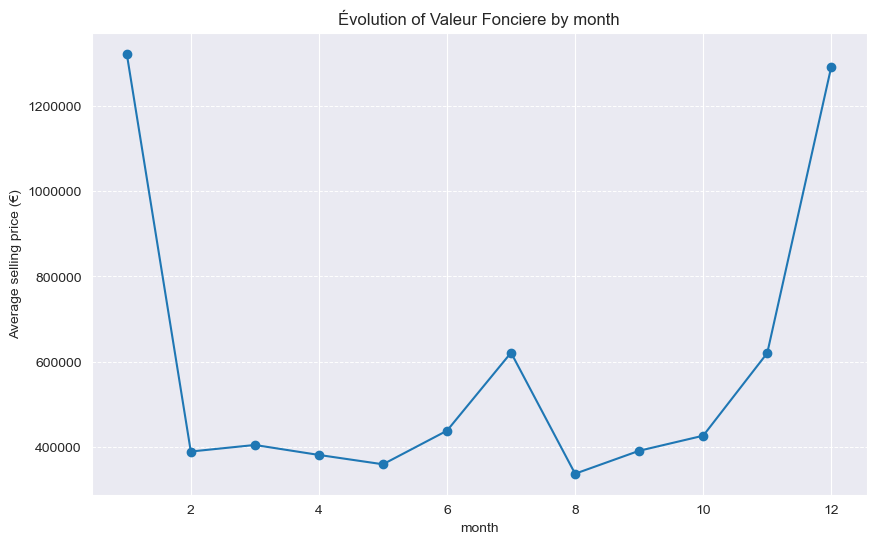

In [85]:
# Calculer le prix de vente moyen par month 
average_price_per_month = df.groupby('Month')['ValeurFonciere'].mean()

# Créer un line plot pour l'évolution du prix de vente moyen par quarter
plt.figure(figsize=(10, 6))
average_price_per_month.plot(kind='line', marker='o')

# Formater l'axe des prix pour éviter la notation scientifique
plt.ticklabel_format(style='plain', axis='y')

plt.title('Évolution of Valeur Fonciere by month')
plt.xlabel('month')
plt.ylabel('Average selling price (€)')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

## CONCLUSIONS :

We saw a great FALL of the average price by MONTH between february to june, We need to inspect more this assumption.

## ANALYS OF TYPE LOCAL SALES


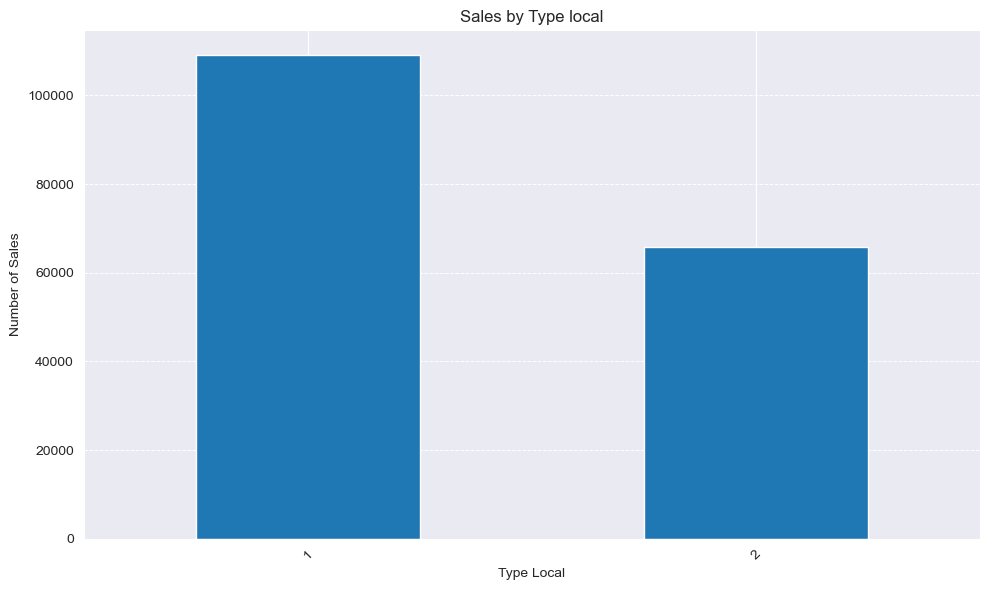

In [99]:
# Calculer le nombre de ventes par type local
sales_per_type_local = df['CodeTypeLocal'].value_counts().sort_index()

# Créer un bar plot pour le nombre de ventes par C:\Users\jonat\Documents\0000000_YNOV\0000_EXAMEN\00_EXPLO_DVF\NOTEBOOKS\00_FIRST_EXPLO.ipynb
plt.figure(figsize=(10, 6))
sales_per_type_local.plot(kind='bar')
plt.title('Sales by Type local')
plt.xlabel('Type Local')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


## ANALYS OF PRICE BY TYPE LOCAL

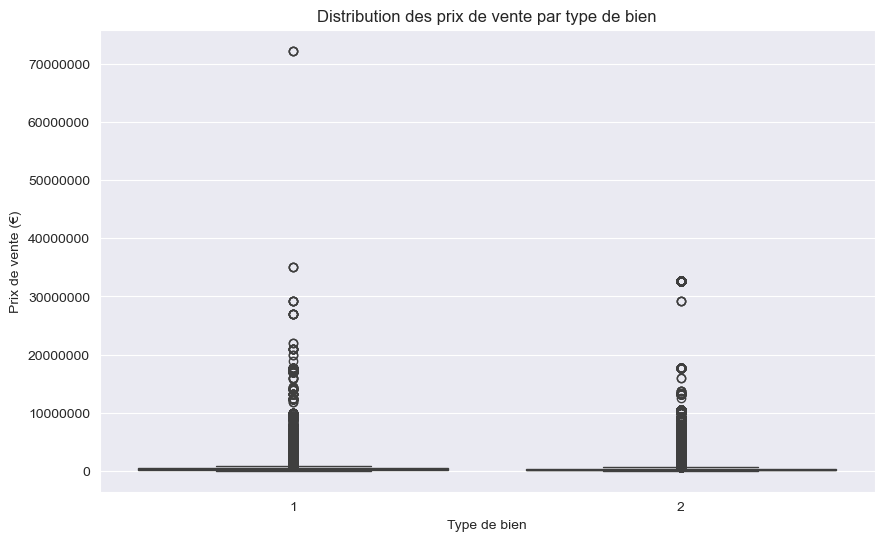

In [91]:
# Supprimez les valeurs manquantes ou nulles
# df = df.dropna(subset=['ValeurFonciere', 'CodeTypeLocal'])

# Analyse descriptive
descriptive_stats = df.groupby('CodeTypeLocal')['ValeurFonciere'].describe()

# Visualisation
plt.figure(figsize=(10, 6))
sns.boxplot(x='CodeTypeLocal', y='ValeurFonciere', data=df)

# Formater l'axe des prix pour éviter la notation scientifique
plt.ticklabel_format(style='plain', axis='y')

# Définir l'échelle de l'axe des y en logarithmique pour mieux gérer les valeurs extrêmes
#plt.yscale('log')

plt.title('Distribution des prix de vente par type de bien')
plt.xlabel('Type de bien')
plt.ylabel('Prix de vente (€)')
plt.show()

### CONCLUSIONS :

This box plot can't be interpretable, we gonna try an other way to see the difference of price by type local

### Other way

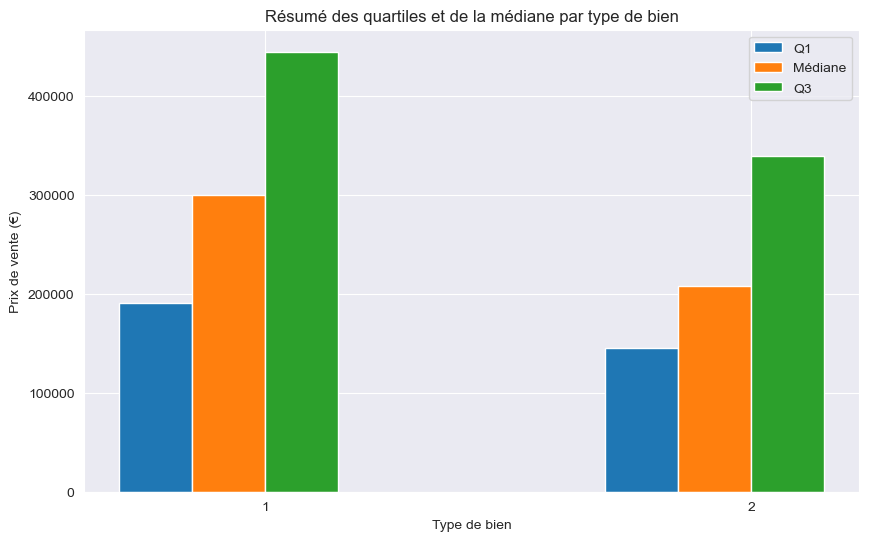

In [97]:
# Calcul des statistiques descriptives pour chaque 'CodeTypeLocal'
stats_df = df.groupby('CodeTypeLocal')['ValeurFonciere'].describe()

# Sélection des quartiles et de la médiane pour chaque 'CodeTypeLocal'
quartiles_df = stats_df.loc[:, ['25%', '50%', '75%']]
quartiles_df.columns = ['Q1', 'Médiane', 'Q3']
quartiles_df['Max'] = stats_df['max']

# Création des graphiques en barres pour chaque quartile et la médiane
fig, ax = plt.subplots(figsize=(10, 6))

# Position sur l'axe des x pour chaque 'CodeTypeLocal' et les groupes de barres
ind = np.arange(len(quartiles_df))  # l'emplacement x des groupes
width = 0.15  # la largeur des barres

# Barres pour Q1
ax.bar(ind - width*1.5, quartiles_df['Q1'], width, label='Q1')

# Barres pour la Médiane
ax.bar(ind - width/2, quartiles_df['Médiane'], width, label='Médiane')

# Barres pour Q3
ax.bar(ind + width/2, quartiles_df['Q3'], width, label='Q3')

# Barres pour Max
#ax.bar(ind + width*1.5, quartiles_df['Max'], width, label='Max')

# Etiquettes et titres
ax.set_xlabel('Type de bien')
ax.set_ylabel('Prix de vente (€)')
ax.set_title('Résumé des quartiles et de la médiane par type de bien')
ax.set_xticks(ind)
ax.set_xticklabels(quartiles_df.index)
ax.legend()

plt.show()

### CONCLUSIONS :

We can see local type 1 is more expensive then 2, so this feature is very important on us ML

In [88]:
# Test statistique - ANOVA
# Importons la fonction f_oneway de la bibliothèque scipy.stats
from scipy.stats import f_oneway

# Préparer les données pour l'ANOVA
types_de_bien = df['CodeTypeLocal'].unique()
grouped_data = [df['ValeurFonciere'][df['CodeTypeLocal'] == type_] for type_ in types_de_bien]

# Effectuer l'ANOVA
anova_results = f_oneway(*grouped_data)

print('Résultats ANOVA:', anova_results)

Résultats ANOVA: F_onewayResult(statistic=nan, pvalue=nan)


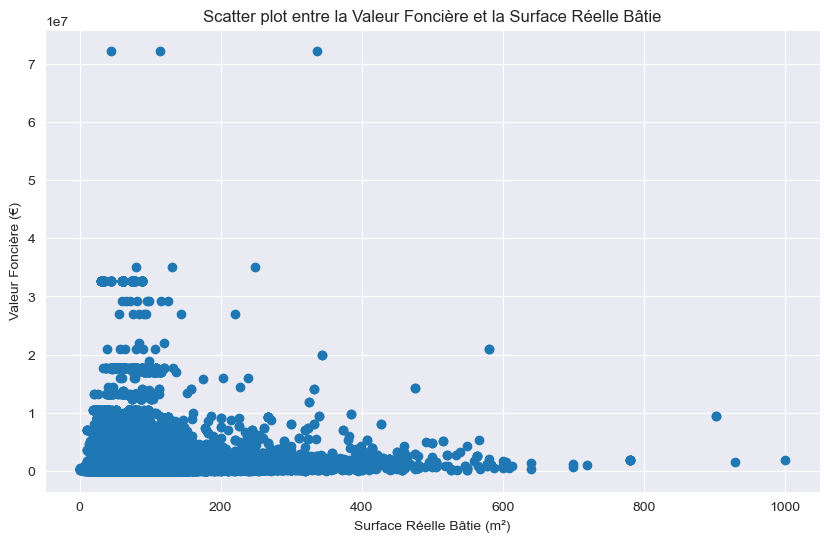

In [27]:
# Créer un scatter plot entre 'ValeurFonciere' et 'SurfaceReelleBati'
plt.figure(figsize=(10, 6))
plt.scatter(df['SurfaceReelleBati'], df['ValeurFonciere'])
plt.title('Scatter plot entre la Valeur Foncière et la Surface Réelle Bâtie')
plt.xlabel('Surface Réelle Bâtie (m²)')
plt.ylabel('Valeur Foncière (€)')
plt.grid(True)
plt.show()